# </center> Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
# import numpy as np
import pandas as pd 
# import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split



Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:

df = pd.read_csv('data.csv')


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = df.dtypes

print('Dane tektowe zawierają kolumny :\n\n', categorical)


Dane tektowe zawierają kolumny :

 age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [6]:
#Sprawdzenie ile jest znaków ? w naszych danych
all_quant = df.shape[0]
for col in df.columns:
    if isinstance(df[col].values[0], str):
        quantity = df[col].str.contains('\\?').sum()
        print(col, ':', quantity, '-', quantity/all_quant*100, '%')
        
    #

workclass : 1836 - 5.638647461687294 %
education : 0 - 0.0 %
marital_status : 0 - 0.0 %
occupation : 1843 - 5.660145572924664 %
relationship : 0 - 0.0 %
race : 0 - 0.0 %
sex : 0 - 0.0 %
native_country : 583 - 1.7904855501980899 %
income : 0 - 0.0 %


In [7]:
#Podmiana ? na NaN
import numpy as np

df['workclass'].replace('\\?', np.NaN, regex=True, inplace=True)
df['occupation'].replace('\\?', np.NaN, regex=True, inplace=True)
df['native_country'].replace('\\?', np.NaN, regex=True, inplace=True)

df.interpolate(method='pad', inplace=True)


all_quant = df.shape[0]
df.workclass.unique()
for col in df.columns:
    if isinstance(df[col].values[0], str):
        quantity = df[col].str.contains('\\?').sum()
        print(col, ':', quantity, '-', quantity/all_quant*100, '%')
#Teraz dane nie zawieraja "?"

workclass : 0 - 0.0 %
education : 0 - 0.0 %
marital_status : 0 - 0.0 %
occupation : 0 - 0.0 %
relationship : 0 - 0.0 %
race : 0 - 0.0 %
sex : 0 - 0.0 %
native_country : 0 - 0.0 %
income : 0 - 0.0 %


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [8]:
X = df.drop(['income'], axis=1)
y = df['income'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [9]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)


/home/mateusz/Pliki_python/Pliki_python/envs/mateuszlecznar/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/mateusz/Pliki_python/Pliki_python/envs/mateuszlecznar/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/mateusz/Pliki_python/Pliki_python/envs/mateuszlecznar/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/mateusz/Pliki_python/Pliki_python/envs/mateuszlecznar/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future

Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [10]:
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

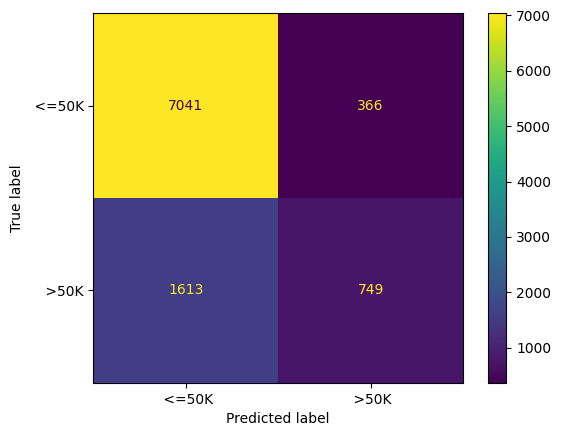

In [11]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)

ConfusionMatrixDisplay(cm, display_labels=gnb.classes_).plot()
plt.show()

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [12]:
df2 = pd.read_csv('data.csv')

df2 = df2[['race', 'native_country', 'income']]

df2.replace('\\?', np.NaN, regex=True, inplace=True)

df2.fillna(method="ffill", inplace=True)

In [13]:
df2['native_country'].value_counts()

 United-States                 29694
 Mexico                          657
 Philippines                     200
 Germany                         141
 Canada                          124
 Puerto-Rico                     118
 El-Salvador                     109
 India                           101
 Cuba                             97
 England                          93
 Jamaica                          83
 South                            80
 China                            77
 Dominican-Republic               74
 Italy                            73
 Vietnam                          72
 Guatemala                        66
 Japan                            63
 Columbia                         61
 Poland                           60
 Taiwan                           51
 Haiti                            45
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 Greece                           30
 

In [14]:
X = df2.drop(['income'], axis=1)
y = df2['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [15]:
encoder = ce.OneHotEncoder(cols=['race', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

/home/mateusz/Pliki_python/Pliki_python/envs/mateuszlecznar/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():
/home/mateusz/Pliki_python/Pliki_python/envs/mateuszlecznar/lib/python3.10/site-packages/category_encoders/one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


In [16]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

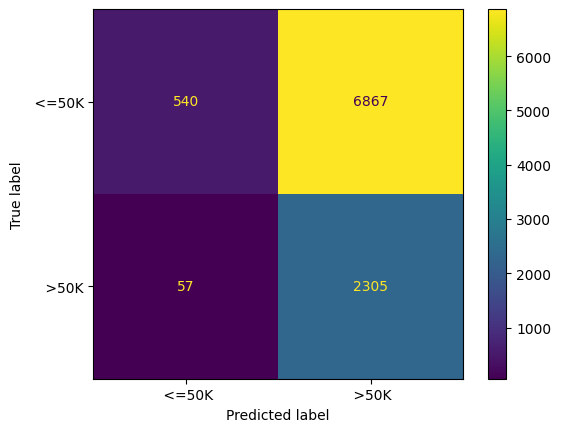

In [17]:
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)

ConfusionMatrixDisplay(cm, display_labels=gnb.classes_).plot()
plt.show()

### WNIOSKI:
Nasz model większość przypadków zaklasyfikował jako >50K i pomylił się w 3/4 przypadków. Wynika to z małej liczby predyktorów nieskorelowanych ze sobą, a także z niezbalansowanego datasetu, tj. przypadków >50K było 3 razy mniej niż <=50K. W najoptymalniejszym przypadku powinna być ich porównywalna ilość.